# Monkey-patching

In [ ]:
#| default_exp patch

In [ ]:
# |hide
from nbdev.showdoc import *

In [ ]:
#| hide
#| export
import torch
from fastcore.foundation import patch_to
import matplotlib.pyplot as plt

from lovely_tensors.repr_str import StrProxy
from lovely_tensors.repr_rgb import RGBProxy
from lovely_tensors.repr_plt import PlotProxy
from lovely_tensors.repr_chans import ChanProxy

In [ ]:
# |export
def monkey_patch(cls=torch.Tensor):
    "Monkey-patch lovely features into `cls`" 

    if not hasattr(cls, '_plain_repr'):
        cls._plain_repr = cls.__repr__
        cls._plain_str = cls.__str__

    @patch_to(cls)
    def __repr__(self: torch.Tensor, *, tensor_contents=None):        
        return str(StrProxy(self))

    # Plain - the old behavior
    @patch_to(cls, as_prop=True)
    def p(self: torch.Tensor, *, tensor_contents=None):
        return StrProxy(self, plain=True)

    # Verbose - print both stats and plain values
    @patch_to(cls, as_prop=True)
    def v(self: torch.Tensor, *, tensor_contents=None):
        return StrProxy(self, verbose=True)

    # .deeper and .deeper(...)
    @patch_to(cls, as_prop=True)
    def deeper(self: torch.Tensor):
        return StrProxy(self, depth=1)

    # .rgb and .rgb(...)
    @patch_to(cls, as_prop=True)
    def rgb(t: torch.Tensor):
        return RGBProxy(t)
    
    # .chans and .chans(...)
    @patch_to(cls, as_prop=True)
    def chans(t: torch.Tensor):
        return ChanProxy(t)

    # .plt and .plt(...)
    @patch_to(cls, as_prop=True)
    def plt(t: torch.Tensor):
        return PlotProxy(t)

In [ ]:
monkey_patch()

In [ ]:
image = torch.load("mysteryman.pt")

In [ ]:
spicy = image.flatten()[:12].clone()

spicy[0] *= 10000
spicy[1] /= 10000
spicy[2] = float('inf')
spicy[3] = float('-inf')
spicy[4] = float('nan')

spicy = spicy.reshape((2,6))
spicy

tensor[2, 6] n=12 x∈[-3.541e+03, -3.369e-05] μ=-393.776 σ=1.180e+03 +Inf! -Inf! NaN!

In [ ]:
spicy.v

tensor[2, 6] n=12 x∈[-3.541e+03, -3.369e-05] μ=-393.776 σ=1.180e+03 +Inf! -Inf! NaN!
tensor([[-3.5405e+03, -3.3693e-05,         inf,        -inf,         nan,
         -4.0543e-01],
        [-4.2255e-01, -4.9105e-01, -5.0818e-01, -5.5955e-01, -5.4243e-01,
         -5.0818e-01]])

In [ ]:
spicy.p

tensor([[-3.5405e+03, -3.3693e-05,         inf,        -inf,         nan,
         -4.0543e-01],
        [-4.2255e-01, -4.9105e-01, -5.0818e-01, -5.5955e-01, -5.4243e-01,
         -5.0818e-01]])

In [ ]:
image.deeper

tensor[3, 196, 196] n=115248 x∈[-2.118, 2.640] μ=-0.388 σ=1.073
  tensor[196, 196] n=38416 x∈[-2.118, 2.249] μ=-0.324 σ=1.036
  tensor[196, 196] n=38416 x∈[-1.966, 2.429] μ=-0.274 σ=0.973
  tensor[196, 196] n=38416 x∈[-1.804, 2.640] μ=-0.567 σ=1.178

In [ ]:
dt = torch.randn(3, 3, 5)
dt.deeper(3)

tensor[3, 3, 5] n=45 x∈[-2.245, 1.792] μ=-0.185 σ=0.996
  tensor[3, 5] n=15 x∈[-1.380, 1.350] μ=-0.535 σ=0.864
    tensor[5] x∈[-1.380, 1.350] μ=-0.577 σ=1.106 [-0.750, 1.350, -1.211, -0.894, -1.380]
    tensor[5] x∈[-1.283, 1.088] μ=-0.136 σ=0.925 [-1.283, -0.223, -0.679, 1.088, 0.417]
    tensor[5] x∈[-1.326, -0.273] μ=-0.892 σ=0.415 [-0.273, -0.725, -0.950, -1.326, -1.184]
  tensor[3, 5] n=15 x∈[-2.245, 1.792] μ=0.093 σ=1.159
    tensor[5] x∈[-0.840, 1.749] μ=0.234 σ=0.979 [0.508, 0.041, 1.749, -0.840, -0.287]
    tensor[5] x∈[-2.245, 1.166] μ=-0.728 σ=1.260 [-0.638, 1.166, -2.245, -0.544, -1.380]
    tensor[5] x∈[-0.558, 1.792] μ=0.773 σ=0.843 [-0.558, 1.792, 0.921, 0.834, 0.878]
  tensor[3, 5] n=15 x∈[-1.330, 1.312] μ=-0.114 σ=0.898
    tensor[5] x∈[-1.330, 0.981] μ=-0.209 σ=1.066 [0.885, -1.330, 0.981, -0.771, -0.812]
    tensor[5] x∈[-0.987, 1.312] μ=-0.021 σ=0.853 [0.108, -0.987, -0.440, 1.312, -0.097]
    tensor[5] x∈[-1.114, 1.154] μ=-0.112 σ=0.968 [-0.138, 0.517, -1.114, -0.

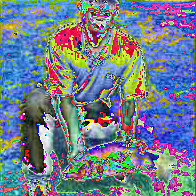

In [ ]:
image.rgb

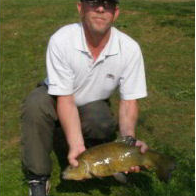

In [ ]:
in_stats = ( (0.485, 0.456, 0.406),     # mean 
             (0.229, 0.224, 0.225) )    # std
image.rgb(in_stats)

/ssd/xl0/work/projects/lovely-tensors/lovely_tensors/repr_chans.py:30: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tcmap = TorchCmap(cmap=get_cmap(cmap),


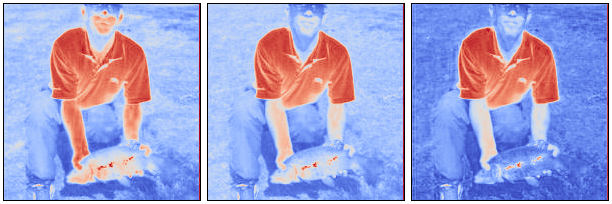

In [ ]:
mean = torch.tensor(in_stats[0])[:,None,None]
std = torch.tensor(in_stats[1])[:,None,None]

(image*std + mean).chans # all pixels in [0, 1] range

In [ ]:
(image*0.3+0.5) # Slightly outside of [0, 1] range

tensor[3, 196, 196] n=115248 x∈[-0.135, 1.292] μ=0.384 σ=0.322

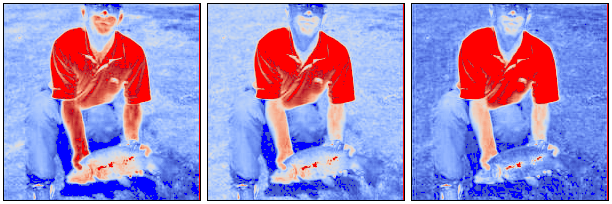

In [ ]:
(image*0.3+0.5).chans # shows clipping (bright blue/red)

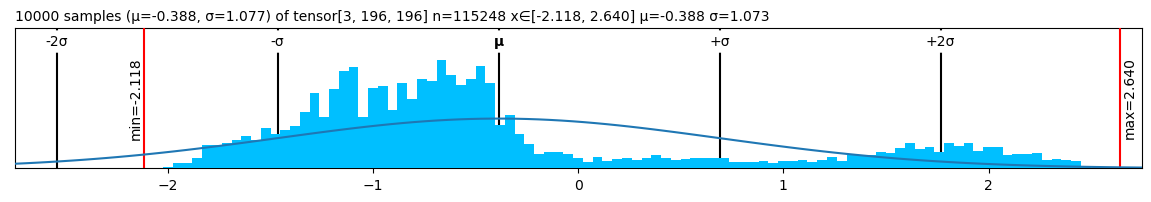

In [ ]:
image.plt

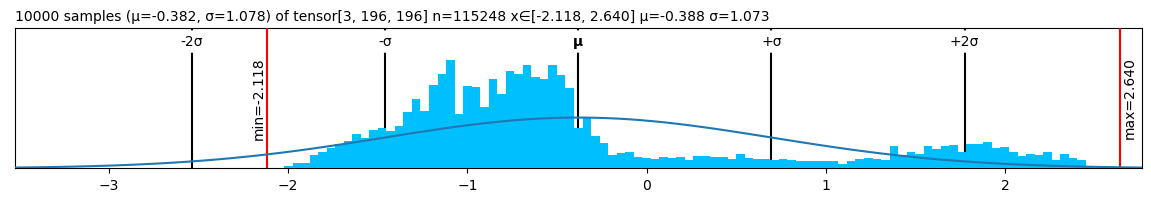

In [ ]:
image.plt(center="mean")

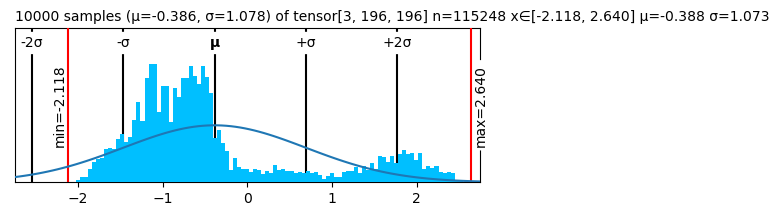

In [ ]:
fig, ax = plt.subplots(figsize=(6, 2))
plt.close(fig)
image.plt(ax=ax)
fig

In [ ]:
# |hide
import nbdev; nbdev.nbdev_export()